In [1]:
## import some packages 

import xarray as xr
import numpy as np
import math
import scipy as sc
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import matplotlib.image as imag


import pickle

In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /pf/b/b309162/work/miniconda3/envs/thunder_cpu_II_plot/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was depreca

In [2]:
## setting a few formatting options for the plots 

fz = 18 # default fontsize
lw = 4 # default linewidth
siz = 100

plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw



# Sea Surface Temperatures of SP simulation (Andersen and Kuang, 2012)

In [3]:
Theta_min=270 # SST min
Theta_max=305 # SST max


In [4]:
# Create custom colormap following [https://stackoverflow.com/questions/14777066/matplotlib-discrete-colorbar]
def color_map_personalizer(Number_of_Colors,vmin0,vmax0):
    """
    author: Gunnar Behrens 
    based on version of Tom Beucler 
    generate personalized color bar with selection of number of color steps
    """
    cmap = plb.cm.gist_stern # use the default plt.cm.gist_stern colormap 
    # extract all colors from the .seismic map
    cmaplist = [cmap(i) for i in np.arange(cmap.N)]
    # create the new map
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
    # define the bins and normalize
    bounds = np.round(np.linspace(vmin0, vmax0, Number_of_Colors),0)
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    return cmap , norm

In [5]:
#generate color map and define lat and lon coords
seism,norm_seism=color_map_personalizer(10,Theta_min,Theta_max)
lon=np.arange(-180, 180, 360/128)
lat=np.arange(-90, 90, 180/64)

In [6]:
Latitude=np.transpose(np.ones([1,91])*np.arange(-90.0,90.5,2))
Longitude=np.ones([1,181])*np.arange(-180,180.5,2)
print(Longitude.shape)

(1, 181)


The next blocks generate the fixed global SST field based on the recipe shown in the supplemental material of Rasp et al., 2018 (https://www.pnas.org/content/115/39/9684/tab-figures-data)

In [7]:
# define Zeta 
Zeta=np.nan*np.zeros([Latitude.size,Longitude.size])
a=np.where((Latitude>5) & (Latitude<=60))[0] # select lat between 5°N and 60°N
b=np.where((Latitude<5) & (Latitude>=-60))[0]# select lat between 5°S and 60°S
c=np.where(np.abs(Latitude)>60)[0] # boreal subpolar and polar latitudes lat > 60°N
d=np.where((Latitude>=-25) & (Latitude<=35))[0]# austral subpolar and polar latitudes lat > 60°N
Zeta[a,:]=sc.sin(np.pi*(Latitude[a,:]-5)/110)**2 # based on Andersen and Kuang 
Zeta[b,:]=sc.sin(np.pi*(Latitude[b,:]-5)/130)**2
Zeta[c,:]=1

<ipython-input-7-eb548901ef90>:7: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  Zeta[a,:]=sc.sin(np.pi*(Latitude[a,:]-5)/110)**2 # based on Andersen and Kuang
<ipython-input-7-eb548901ef90>:8: DeprecationWarning: scipy.sin is deprecated and will be removed in SciPy 2.0.0, use numpy.sin instead
  Zeta[b,:]=sc.sin(np.pi*(Latitude[b,:]-5)/130)**2


In [8]:
#generate SST field as a function of Zeta 
SST=np.nan*np.zeros([Latitude.size,Longitude.size])
SST=2+27/2*(2-Zeta-Zeta**2)
SST_Kelvin=SST+273.15



In [9]:
# define a few latitudinal bands 
long_band=[-180,180,180,-180,-180]
NH_mid_lat=[60,60,35,35,60] # Northern Hemisphere mid latitudes
SH_mid_lat=[-60,-60,-35,-35,-60] # Southern Hemisphere mid latitudes 
tropics=[-10,-10,10,10,-10]# Deep Tropics 


plot SST field together with latitudinal bands for orientation

<ipython-input-10-561273c7dd73>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(long_band,NH_mid_lat,'b',Linewidth=2,transform=ccrs.PlateCarree())
<ipython-input-10-561273c7dd73>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(long_band,SH_mid_lat,'r',Linewidth=2,transform=ccrs.PlateCarree())
<ipython-input-10-561273c7dd73>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(long_band,tropics,'g',Linewidth=2,transform=ccrs.PlateCarree())


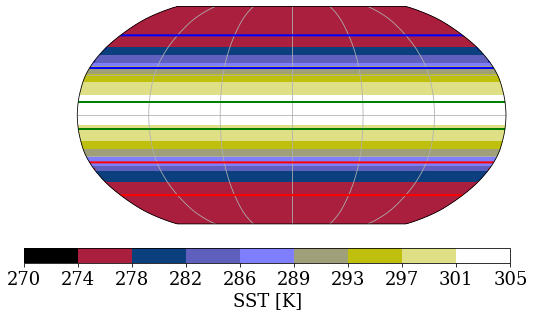

In [10]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection':ccrs.Robinson(central_longitude=0)},figsize=(9,4))

data = SST_Kelvin; tit = ''
    

imag=plt.pcolormesh(Longitude, Latitude, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=Theta_min,vmax=Theta_max)
plt.plot(long_band,NH_mid_lat,'b',Linewidth=2,transform=ccrs.PlateCarree())
plt.plot(long_band,SH_mid_lat,'r',Linewidth=2,transform=ccrs.PlateCarree())
plt.plot(long_band,tropics,'g',Linewidth=2,transform=ccrs.PlateCarree())

ax.gridlines()
ax.set_title(tit,loc='left',fontsize=3*fz/4)

cbar_ax = fig.add_axes([0.1, -0.01, 0.75, 0.05])
c_bar=fig.colorbar(imag, label="SST [K]", cax=cbar_ax,orientation='horizontal')


# VAE$_{clim \rightarrow clim + conv}$ architecture 

In [11]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as mp

from tensorflow.keras.layers import Lambda, Input, Dense
from cbrain.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LearningRateScheduler,Callback


import numpy as np
import matplotlib.pyplot as plt
import argparse
import os


import tensorflow as tf
from cbrain.imports import *

from cbrain.utils import *
import pandas as ps

# reparameterization trick of VAE 
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    based on VAE presented on keras webpage for keras version 1 /
    recent keras VAE version can be seen on
    https://keras.io/examples/generative/vae/
    """

    z_mean, z_log_var = args
    batch= K.shape(z_mean)[0]
    dim=K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon=K.random_normal(shape=(batch,dim)) # epsilion= random_normal distributed tensor
    sample_prob=z_mean+K.exp(0.5*z_log_var)*epsilon #exp= elementwise exponential
    return sample_prob

# kl annealing to improve reproduction skills of VAE 
klstart = 2
# number of epochs over which KL scaling is increased from 0 to 1
kl_annealtime = 5

class AnnealingCallback(Callback):
    def __init__(self, weight):
        self.weight = weight
    def on_epoch_end (self, epoch, logs={}):
        if epoch > klstart :
            new_weight = min(K.get_value(self.weight) + (1./kl_annealtime), 1.)
            K.set_value(self.weight, new_weight)
        print ("Current KL Weight is " + str(K.get_value(self.weight)))


# the starting value of weight is 0
# define it as a keras backend variable
weight = K.variable(0.)

    
original_dim_input=64  # input node size (CAM variables)

original_dim_output=int(65+64) # output node size (SP + CAM variables)


# network parameters
input_shape = (original_dim_input,)
out_shape=(original_dim_output,)
intermediate_dim = 463 # nodes in first hidden layers of encoder and last hidden layers of decoder 
batch_size = 714
latent_dim = 5 # latent space dimensions
epochs = 40    
    
## Encoder 
inputs =Input(shape=input_shape, name='encoder_input')
x_0 =Dense(intermediate_dim, activation='relu')(inputs)
x_1 =Dense(intermediate_dim, activation='relu')(x_0)
x_2 =Dense(int(np.round(intermediate_dim/2)), activation='relu')(x_1)
x_3 =Dense(int(np.round(intermediate_dim/4)), activation='relu')(x_2)
x_4 =Dense(int(np.round(intermediate_dim/8)), activation='relu')(x_3)
x_5 =Dense(int(np.round(intermediate_dim/16)), activation='relu')(x_4)



z_mean = Dense(latent_dim, name='z_mean')(x_5)
z_log_var = Dense(latent_dim, name='z_log_var')(x_5)



# reparametrization trick
z = Lambda(sampling, output_shape=(latent_dim), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()


## Decoder
decoder_inputs =Input(shape=(latent_dim,), name='decoder_input')
x_1 =Dense(int(np.round(intermediate_dim/16)), activation='relu')(decoder_inputs)
x_2 =Dense(int(np.round(intermediate_dim/8)), activation='relu')(x_1)
x_3 =Dense(int(np.round(intermediate_dim/4)), activation='relu')(x_2)
x_4 =Dense(int(np.round(intermediate_dim/2)), activation='relu')(x_3)
x_5 =Dense(intermediate_dim, activation='relu')(x_4)
x_6 =Dense(intermediate_dim, activation='relu')(x_5)

outputs = Dense(original_dim_output, activation='elu')(x_6)

decoder = Model(decoder_inputs, outputs, name='decoder')
decoder.summary()

emul_outputs=decoder(encoder(inputs)[2])

kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
VAE_loss = K.mean(kl_loss*weight)


VAE_clim_clim_conv=Model(inputs,emul_outputs)
VAE_clim_clim_conv.add_loss(VAE_loss)
VAE_clim_clim_conv.add_metric(kl_loss, name='kl_loss', aggregation='mean')


#loading the output normalization scalars for SP variables ( stds over 3 months of SP simulation)

scale_array=ps.read_csv('nn_config/scale_dicts/Scaling_cond_VAE.csv')


PHQ_std_surf=scale_array.PHQ_std.values[-1]

TPHYSTND_std_23=scale_array.TPHYSTND_std.values[-1]# for dT/dt we are using the std on level 23 ~ 845 hPa

PRECT_std=scale_array.PRECT_std.values
FSNS_std=scale_array.FSNS_std.values
FSNT_std=scale_array.FSNT_std.values
FLNS_std=scale_array.FLNS_std.values
FLNT_std=scale_array.FLNT_std.values

# and the CAM variables 
scale_array_2D=ps.read_csv('nn_config/scale_dicts/Scaling_enc_II_range_profiles.csv')
scale_array_1D=ps.read_csv('nn_config/scale_dicts/Scaling_enc_II_range.csv')

TBP_std_surf=scale_array_2D.TBP_std.values[-1]

QBP_std_surf=scale_array_2D.QBP_std.values[-1]

Q_lat_std_surf=scale_array_1D.Q_lat_std.values

Q_sens_std_surf=scale_array_1D.Q_sens_std.values


Q_solar_std_surf=scale_array_1D.Q_sol_std.values

PS_std_surf=scale_array_1D.PS_std.values


# defining the scaling dict for the VAE training 

scale_dict_II = {
    'PHQ': 1/PHQ_std_surf, 
    'QBP':1/QBP_std_surf,
    'TPHYSTND': 1/TPHYSTND_std_23, 
    'TBP':1/TBP_std_surf,
    'FSNT': 1/FSNT_std, 
    'FSNS': 1/FSNS_std, 
    'FLNT': 1/FLNT_std, 
    'FLNS': 1/FLNS_std, 
    'PRECT': 1/PRECT_std, 
    'LHFLX': 1/Q_lat_std_surf, 
    'SHFLX': 1/Q_sens_std_surf, 
    'SOLIN': 1/Q_solar_std_surf,
    'PS':1/PS_std_surf
}

in_vars = ['QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']
out_vars = ['PHQ','TPHYSTND','FSNT', 'FSNS', 'FLNT', 'FLNS', 'PRECT','QBP', 'TBP','PS', 'SOLIN', 'SHFLX', 'LHFLX']

## CAM variables
#QBP = specific humidity
#TBP = temperature 
#PS = surface pressure 
#SOLIN = solar insolation
#SHFLX = surface sensible heat flux 
#LHFLX = surface latent heat flux

##  SP variables=
#PHQ = specific humidity tendency 
#TPHYSTND = temperature tendency 
#FSNT = shortwave heat flux model top
#FSNS = shortwave heat flux model surface 
#FLNT = longwave heat flux model top (OLR)
#FLNS = longwave heat flux model surface 
#PRECT = precipitation rate 

# Takes representative value for PS since purpose is normalization
PS = 1e5; P0 = 1e5;
P = P0*hyai+PS*hybi; # Total pressure [Pa]
dP = P[1:]-P[:-1];


Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 64)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 463)          30095       encoder_input[0][0]              
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 463)          214832      dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 232)          107648      dense_1[0][0]                    
____________________________________________________________________________________________

In [12]:
from cbrain.data_generator import DataGenerator
# use of the test data set again
val_gen_II = DataGenerator(
    data_fn = '../preprocessed_data/1918_train_3_month_OND.nc',
    input_vars = in_vars,
    output_vars = out_vars,
    norm_fn = '../preprocessed_data/000_norm_1_month.nc',
    input_transform = ('mean', 'maxrs'),
    output_transform = scale_dict_II,
    batch_size=8192,
    shuffle=True
)


# time steps of test data set 
time=4415




In [13]:
VAE_clim_clim_conv.load_weights('./saved_models/VAE_clim_clim_conv/VAE_clim_clim_conv_BN5_40_opt_anneal.h5')


# produce global latent space time series of VAE$_{clim \rightarrow clim + conv}$

In [17]:

encoder_lat_data= np.nan* np.zeros((time,int(lat.size *lon.size),5))
for i in tqdm(np.arange(time)):
    encoder_lat_data[i]=encoder.predict(val_gen_II[i][0])[2]   

encoder_resp_=np.reshape(encoder_lat_data,(int(time*lat.size*lon.size),5))


In [ ]:
#np.save('VAE_clim_clim_conv_encoder_pred_3_month_global',encoder_resp_)
#del encoder_lat_data

load saved latent space time series of VAE$_{clim \rightarrow clim + conv}$

In [14]:
encoder_resp_=np.load('VAE_clim_clim_conv_encoder_pred_3_month_global.npy')

compress latent space with PCA from 5D to 2D

In [15]:
encoder_resp_pca=PCA(n_components=2).fit_transform(encoder_resp_)


In [23]:
# Based on https://stackoverflow.com/questions/2413522/weighted-standard-deviation-in-np
def weighted_avg_and_std(values, weights,glob_mean):
    """
    author: Gunnar Behrens 
    Return the weighted average, standard deviation, and 
    anomaly to noise ratio (cond_average - global_mean)/cond_std.
    values, weights -- np ndarrays with the same shape.
    
    set np.nan flags for single-values or constant values in grid cells (variance==0)
    """
    
#    print(weights.sum())
    if weights.sum()>0:
        average = np.average(values, weights=weights) # compute grid-cell average
        variance = np.average((values-average)**2, weights=weights)# and variance

        if variance>0:
            anomal_std_ratio=(average-glob_mean)/np.sqrt(variance)
            
        if variance==0:
            
            anomal_std_ratio=np.nan
            
        
        return (average, np.sqrt(variance),anomal_std_ratio)
    if  weights.sum()==0:
        
        average = np.nan
        variance =np.nan
        anomal_std_ratio=np.nan
        
        return (average, np.sqrt(variance),anomal_std_ratio)
        
        

# Make function to calculate conditional mean and std
# We condition field_y on field_x
def conditional_avg_and_std(y_bin_edges,x_bin_edges,field_x,field_y,global_mean_y):
    """
    produce conditional average and std fields for 2D PCA compressed latent space
    """
    # Initialization
    Nbin = np.size(x_bin_edges)
    Ym = np.zeros((Nbin-1,Nbin-1))
    Ystd = np.copy(Ym)
    Yanomaly_std_ratio=np.copy(Ym)
    edge_left=x_bin_edges[0]
    y_edge_bottom=y_bin_edges[0]
    for jbin,y_edge in enumerate(y_bin_edges):
        print('jbin=',jbin,'/',Nbin-1,' & edge=',y_edge,end="\r")

        for ibin,edge in enumerate(x_bin_edges):
#            print('ibin=',ibin,'/',Nbin-1,' & edge=',edge,end="\r")
            if jbin>0:
                if ibin>0:
                    w = ((field_x[:,0]>=edge_left)&(field_x[:,0]<edge))&((field_x[:,1]>=y_edge_bottom)&(field_x[:,1]<y_edge))
                    #print(w.shape)
                    Ym[jbin-1,ibin-1],Ystd[jbin-1,ibin-1],Yanomaly_std_ratio[jbin-1,ibin-1] = weighted_avg_and_std(field_y,w,global_mean_y)

            edge_left = edge
        y_edge_bottom=y_edge
    
    return Ym,Ystd,Yanomaly_std_ratio

select random samples 

In [24]:
rand_no=1000000
rand_sample=np.random.randint(0,encoder_resp_pca[:,0].size,rand_no)


In [25]:
def field_cond_figure(Bin_size_x_and_y,Number,lat_pca_space,SPCAM_var,scaling_factor,
                      title,var_min,var_max,std_var_min,std_var_max,ano_std_rat_min,ano_std_rat_max,
                      color_map,color_map_2,color_map_3): 
    """
    author: Gunnar Behrens
    retrieve conditional averages and plot with inline random sampling
    
    Number = Number of random sampling 
    scaling factor = scale to specific SPCAM units 
    """
    
    import matplotlib as mpl
    
    rand_samples=np.random.randint(0,SPCAM_var.size,Number)# get random samples out of data set 
    rand_SPCAM=SPCAM_var[rand_samples]
    rand_encoder_pca_model_data=lat_pca_space[rand_samples]# PCA compressed latent space of random samples 
 
    yy=np.linspace(np.min(lat_pca_space[:,1]),np.max(lat_pca_space[:,1]),Bin_size_x_and_y)# construct PC 1 axis 
    xx=np.linspace(np.min(lat_pca_space[:,0]),np.max(lat_pca_space[:,0]),Bin_size_x_and_y)# construct PC 2 axis
    
    global_mean=np.squeeze(np.mean(SPCAM_var)*scaling_factor) # apply unit scaling and compute average of SP variable
    print(global_mean)
    # compute conditional averages , stds and anomaly_std_ratios
    a,b,c=conditional_avg_and_std(yy,xx,rand_encoder_pca_model_data,rand_SPCAM*scaling_factor,global_mean)
    
    
    #plt.figure(1,(7,7))
    #plt.pcolormesh(xx,yy,a,cmap=color_map)
    #plt.grid(True)
    #plt.title(title + 'mean',Fontsize=14)
    #plt.xlabel('PC 1 of latent space',Fontsize=13)
    #plt.ylabel('PC 2 of latent space',Fontsize=13)
    #plt.clim(var_min,var_max)
    #plt.colorbar()
    
    #plt.figure(2,(7,7))
    #plt.pcolormesh(xx,yy,b,cmap=color_map_2)
    #plt.grid(True)
    #plt.title(title + 'std',Fontsize=14)
    #plt.xlabel('PC 1 of latent space',Fontsize=13)
    #plt.ylabel('PC 2 of latent space',Fontsize=13)
    #plt.clim(std_var_min,std_var_max)
    #plt.colorbar()
    
    #plt.figure(3,(7,7))
    #plt.pcolormesh(xx,yy,c,cmap=color_map_3)
    #plt.grid(True)
    #plt.title(title + 'signal to noise ratio',Fontsize=14)
    #plt.xlabel('PC 1 of latent space',Fontsize=13)
    #plt.ylabel('PC 2 of latent space',Fontsize=13)
    #plt.clim(ano_std_rat_min,ano_std_rat_max)
    #plt.colorbar()
    
    
    return a,xx,yy
    
    

In [26]:
def field_cond_figure_1(Bin_size_x_and_y,rand_sample,lat_pca_space,SPCAM_var,scaling_factor,
                      title,var_min,var_max,std_var_min,std_var_max,ano_std_rat_min,ano_std_rat_max,
                      color_map,color_map_2,color_map_3):
    """
    author: Gunnar Behrens
    retrieve conditional averages and plot with predefined random samples
    
    Number = Number of random sampling 
    scaling factor = scale to specific SPCAM units 
    """
    
    import matplotlib as mpl
    
    rand_samples=rand_sample # use predefined random samples 
    rand_SPCAM=SPCAM_var[rand_samples]
    rand_encoder_pca_model_data=lat_pca_space[rand_samples]
 
    yy=np.linspace(np.min(lat_pca_space[:,1]),np.max(lat_pca_space[:,1]),Bin_size_x_and_y)
    xx=np.linspace(np.min(lat_pca_space[:,0]),np.max(lat_pca_space[:,0]),Bin_size_x_and_y)
    
    global_mean=np.squeeze(np.mean(SPCAM_var)*scaling_factor)# apply scaling to specific unit and compute mean of SP var
    print(global_mean) # return overall variable mean 
    # compute cond. means , stds and anomaly to stds ratio
    a,b,c=conditional_avg_and_std(yy,xx,rand_encoder_pca_model_data,rand_SPCAM*scaling_factor,global_mean)
    
    
    #plt.figure(1,(7,7))
    #plt.pcolormesh(xx,yy,a,cmap=color_map)
    #plt.grid(True)
    #plt.title(title + 'mean',Fontsize=14)
    #plt.xlabel('PC 1 of latent space',Fontsize=13)
    #plt.ylabel('PC 2 of latent space',Fontsize=13)
    #plt.clim(var_min,var_max)
    #plt.colorbar()
    
    #plt.figure(2,(7,7))
    #plt.pcolormesh(xx,yy,b,cmap=color_map_2)
    #plt.grid(True)
    #plt.title(title + 'std',Fontsize=14)
    #plt.xlabel('PC 1 of latent space',Fontsize=13)
    #plt.ylabel('PC 2 of latent space',Fontsize=13)
    #plt.clim(std_var_min,std_var_max)
    #plt.colorbar()
    
    #plt.figure(3,(7,7))
    #plt.pcolormesh(xx,yy,c,cmap=color_map_3)
    #plt.grid(True)
    #plt.title(title + 'signal to noise ratio',Fontsize=14)
    #plt.xlabel('PC 1 of latent space',Fontsize=13)
    #plt.ylabel('PC 2 of latent space',Fontsize=13)
    #plt.clim(ano_std_rat_min,ano_std_rat_max)
    #plt.colorbar()
    
    
    
    
    return a,xx,yy
    
    
                      

select precipitation data from test data 

In [20]:
precip=np.nan*np.zeros((time,int(lat.size*lon.size)))
for i in tqdm(np.arange(time)):
    precip[i]=val_gen_II.output_transform.inverse_transform(val_gen_II[i][1])[:,64]


<ipython-input-20-1a7f2f4f364a>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(np.arange(time)):


In [21]:
precip_=np.reshape(precip,int(time*lat.size*lon.size))
del precip

compute conditional averages of SP precipitation data set in latent space of VAE$_{clim \rightarrow clim + conv}$ with predefined random samples

In [27]:
precipitation,xx,yy=field_cond_figure_1(50,rand_sample,encoder_resp_pca,precip_,1000*3600,'VAE_clim_clim+conv precipitation [mm/h] '
                  ,0,8,0,3,-5,5,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)

0.11053560986612608


get CAM solar insolation data set

In [29]:
SOLIN=np.nan*np.zeros((time,int(lat.size*lon.size)))
for i in tqdm(np.arange(time)):
    SOLIN[i]=val_gen_II.output_transform.inverse_transform(val_gen_II[i][1])[:,126]


<ipython-input-29-cb3f89cda84b>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(np.arange(time)):


In [30]:
SOLIN_resh=np.reshape(SOLIN,int(time*lat.size*lon.size))
del SOLIN

Retrieve SP shortwave heat flux at the model top 

In [24]:
Q_sw_top=np.nan*np.zeros((time,int(lat.size*lon.size)))
for i in tqdm(np.arange(time)):
    Q_sw_top[i]=val_gen_II.output_transform.inverse_transform(val_gen_II[i][1])[:,60]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061


3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705


In [25]:
Q_sw_top_resh=np.reshape(Q_sw_top,int(time*lat.size*lon.size))
del Q_sw_top

and SP outgoing longwave radiation at the model top

In [26]:
OLR=np.nan*np.zeros((time,int(lat.size*lon.size)))
for i in tqdm(np.arange(time)):
    OLR[i]=val_gen_II.output_transform.inverse_transform(val_gen_II[i][1])[:,62]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067


3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707


In [27]:
OLR_resh=np.reshape(OLR,int(time*lat.size*lon.size))

Select surface temperature as further CAM variable 

In [28]:
T_surf=np.nan*np.zeros((time,int(lat.size*lon.size)))
for i in tqdm(np.arange(time)):
    T_surf[i]=val_gen_II.output_transform.inverse_transform(val_gen_II[i][1])[:,124]


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709


In [29]:
T_surf_=np.reshape(T_surf,int(time*lat.size*lon.size))
del T_surf

# Compute conditional averages of OLR, solar insolation, shortwave heat flux model top and surface air temperature

In [30]:
OLR=field_cond_figure_1(50,rand_sample,encoder_resp_pca,OLR_resh,1,'VAE_clim_clim+conv OLR [W/m²] ',
                  50,320,0,80,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

222.49417578777675


In [31]:
SOLIN=field_cond_figure_1(50,rand_sample,encoder_resp_pca,SOLIN_resh,1,'VAE_clim_clim+conv solar insolation [W/m²] '
                  ,0,1400,0,700,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

326.0790779369521


In [32]:
Q_SW_TOP=field_cond_figure_1(50,rand_sample,encoder_resp_pca,Q_sw_top_resh,1,'VAE_clim_clim+conv sw Q_top [W/m²] '
                  ,0,1200,0,500,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

231.61601316221706


In [33]:
T_surf=field_cond_figure_1(50,rand_sample,encoder_resp_pca,T_surf_,1,'VAE_clim_clim+conv T surf [K] '
                  ,270,303,0,5.5,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

283.69610789159515


# Analysis of samples from tropics (10°S to 10°N) 

In [35]:
# help arrays to determine the latitude of each sample
latit_array=np.reshape((lat.T*np.ones((lat.size,lon.size)).T).T,int(lat.size*lon.size))


latit_timestep_array=np.reshape((latit_array.T*np.ones((latit_array.size,4415)).T),int(latit_array.size*4415))



In [36]:
trops=np.where((latit_timestep_array<10)&(latit_timestep_array>-10))[0] # select latitudinal band between 10°S to 10°N


In [34]:
encoder_resp_trop=encoder_resp_[trops]# select tropical latent space samples of VAE_clim_clim_conv
encoder_resp_trop_pca=PCA(n_components=2).fit_transform(encoder_resp_trop)# compress tropical latent space into 2D


compute conditional averages in tropical PCA compressed latent space 

In [37]:
precip_trop=precip_[trops]

In [38]:
precip_tropic,xx_trop,yy_trop=field_cond_figure(50,1000000,encoder_resp_trop_pca,precip_trop,1000*3600,'VAE_clim_clim+conv precipitation [mm/h] '
                  ,0,10,0,1.5,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)

0.33335512510559084


In [39]:
OLR_tropic=field_cond_figure(50,1000000,encoder_resp_trop_pca,OLR_resh[trops],1,'VAE_clim_clim+conv OLR [W/m²] ',
                  50,320,0,80,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

236.8318980849632


In [40]:
SOLIN_tropic=field_cond_figure(50,1000000,encoder_resp_trop_pca,SOLIN_resh[trops],1,'VAE_clim_clim+conv solar insolation [W/m²] ',
                  0,1400,0,400,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

408.8310715288225


In [41]:
Q_sw_tropic=field_cond_figure(50,1000000,encoder_resp_trop_pca,Q_sw_top_resh[trops],1,'VAE_clim_clim+conv sw Q_top [W/m²] ',
                  0,1200,0,400,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

276.335915691082


In [42]:
SAT_trop=field_cond_figure(50,1000000,encoder_resp_trop_pca,T_surf_[trops],1,'VAE_clim_clim+conv T [K] ',
                  295,303,0,1.0,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]



300.0550367914344


# Analysis of Northern Hemisphere mid latitude samples (35°N to 60°N)

In [43]:
NH_ml=np.where((latit_timestep_array<60)&(latit_timestep_array>35))[0]


In [44]:
encoder_resp_NH_mid_lat=encoder_resp_[NH_ml] #select samples from boreal mid latitudes in latent space


In [46]:
encoder_resp_NH_mid_lat_pca=PCA(n_components=2).fit_transform(encoder_resp_NH_mid_lat)# compress to 2D


Compute conditional averages in 2D PCA compressed latent space for samples from Northern Hemisphere mid latitudes 

In [45]:
precip_NH_mid_lat=precip_[NH_ml]


In [47]:
precip_NH_ml,xx_NH,yy_NH=field_cond_figure(50,1000000,encoder_resp_NH_mid_lat_pca,precip_NH_mid_lat,1000*3600,'VAE_clim_clim+conv precipitation [mm/h] '
                  ,0,5,0,1,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)

0.1434212142034466


In [48]:
OLR_NH_ml=field_cond_figure(50,1000000,encoder_resp_NH_mid_lat_pca,OLR_resh[NH_ml],1,'VAE_clim_clim+conv OLR [W/m²] '
                  ,50,280,0,50,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

198.08086041808053


In [49]:
SOLIN_NH_ml=field_cond_figure(50,1000000,encoder_resp_NH_mid_lat_pca,SOLIN_resh[NH_ml],1,'VAE_clim_clim+conv solar insolation [W/m²] ',
                  0,350,0,300,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

106.19728964861373


In [50]:
Q_sw_NH_ml=field_cond_figure(50,1000000,encoder_resp_NH_mid_lat_pca,Q_sw_top_resh[NH_ml],1,'VAE_clim_clim+conv sw Q_top [W/m²] ',
                  0,350,0,350,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

58.942767462303856


In [51]:
SAT_NH=field_cond_figure(50,1000000,encoder_resp_NH_mid_lat_pca,T_surf_[NH_ml],1,'VAE_clim_clim+conv T [K] '
                  ,270,290,0,6.5,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

278.69557833262957


# Analysis of samples from austral mid latitudes (35°S to 60°S)

In [52]:
SH_ml=np.where((latit_timestep_array>-60)&(latit_timestep_array<-35))[0]


In [53]:
encoder_resp_SH_mid_lat=encoder_resp_[SH_ml]


In [55]:
encoder_resp_SH_mid_lat_pca=PCA(n_components=2).fit_transform(encoder_resp_SH_mid_lat)


compute conditional averages for austral mid latitude samples 

In [54]:
precip_SH_mid_lat=precip_[SH_ml]

In [56]:
precip_SH,xx_SH,yy_SH=field_cond_figure(50,1000000,encoder_resp_SH_mid_lat_pca,precip_SH_mid_lat,1000*3600,'VAE_clim_clim+conv precipitation [mm/h] '
                  ,0,5,0,1.0,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)

0.09513016198846128


In [57]:
OLR_SH=field_cond_figure(50,1000000,encoder_resp_SH_mid_lat_pca,OLR_resh[SH_ml],1,'VAE_clim_clim+conv OLR [W/m²] '
                  ,80,250,0,50,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

214.13300154622252


In [58]:
SOLIN_SH=field_cond_figure(50,1000000,encoder_resp_SH_mid_lat_pca,SOLIN_resh[SH_ml],1,'VAE_clim_clim+conv solar insolation [W/m²] ',
                  0,1400,0,300,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

504.31535721748685


In [59]:
Q_sw_SH_ml=field_cond_figure(50,1000000,encoder_resp_SH_mid_lat_pca,Q_sw_top_resh[SH_ml],1,'VAE_clim_clim+conv sw Q_top [W/m²] ',
                  0,1200,0,350,-20,20,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

340.1222675203948


In [60]:
SAT_SH=field_cond_figure(50,1000000,encoder_resp_SH_mid_lat_pca,T_surf_[SH_ml],1,'VAE_clim_clim+conv T [K] '
                  ,275,290,0,6.5,-10,10,plt.cm.gist_stern,plt.cm.gist_stern,plt.cm.twilight_shifted)[0]

278.7682674396199


# Plotting the results of conditional average analysis in 2D PCA compressed latent space of VAE$_{clim \rightarrow clim + conv}$

<ipython-input-59-a13b4b7e66d6>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(long_band,NH_mid_lat,'b',Linewidth=3,transform=ccrs.PlateCarree())
<ipython-input-59-a13b4b7e66d6>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(long_band,SH_mid_lat,color=[0.05,0.7,0.8,1],Linewidth=3,transform=ccrs.PlateCarree())
<ipython-input-59-a13b4b7e66d6>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.plot(long_band,tropics,'green',Linewidth=3,transform=ccrs.PlateCarree())
<ipython-input-59-a13b4b7e66d6>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('SST [K]',Fontsize=20)
<ipython-input-59-a13b4b7e66d6>

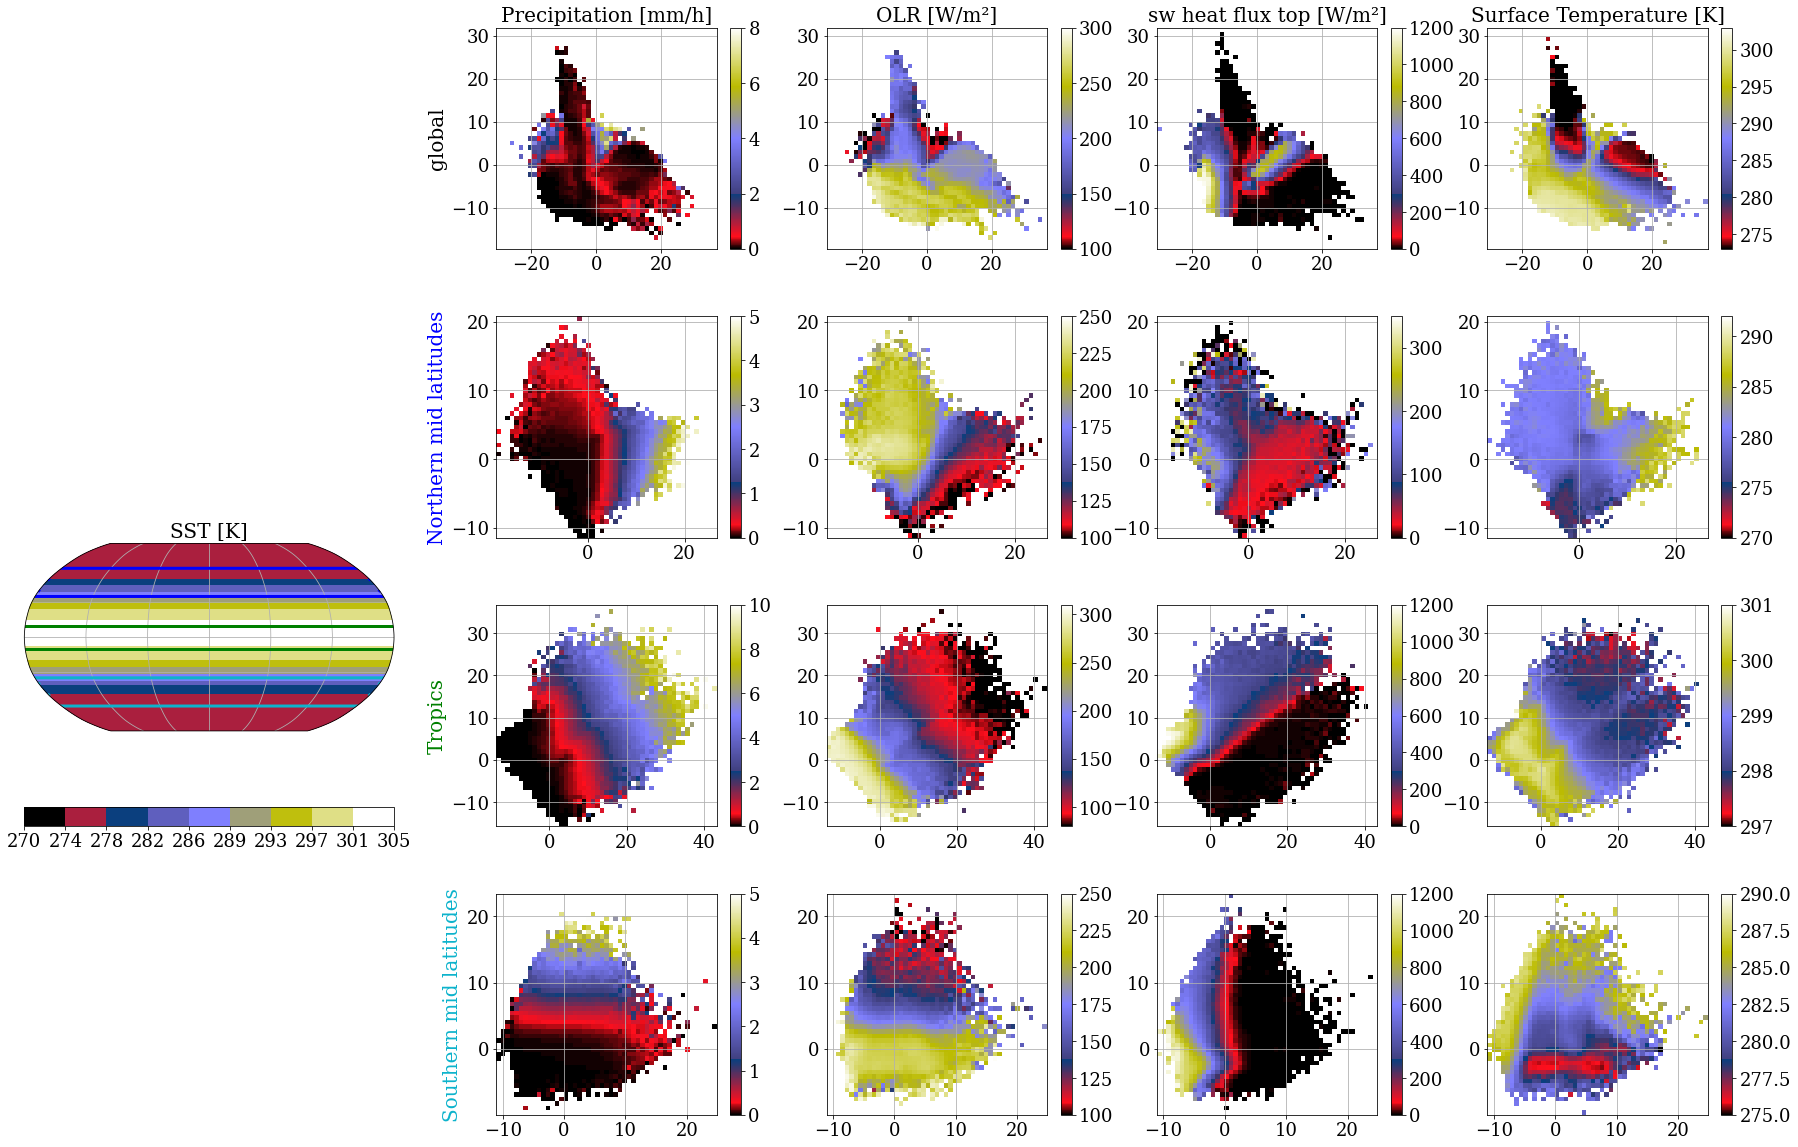

In [59]:
#old with 10 cbar ticks
fig = plt.figure(3,(32,20))

gs = fig.add_gridspec(19, 38)

ax1 = fig.add_subplot(gs[6:15, 0:8], projection=ccrs.Robinson(central_longitude=0))

imag=ax1.pcolormesh(Longitude, Latitude, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=Theta_min,vmax=Theta_max)
ax1.plot(long_band,NH_mid_lat,'b',Linewidth=3,transform=ccrs.PlateCarree())
ax1.plot(long_band,SH_mid_lat,color=[0.05,0.7,0.8,1],Linewidth=3,transform=ccrs.PlateCarree())
ax1.plot(long_band,tropics,'green',Linewidth=3,transform=ccrs.PlateCarree())

ax1.gridlines()
plt.title('SST [K]',Fontsize=20)

#cbar_ax = fig.add_axes([0.10, 0.41, 0.15, 0.02])

plt.colorbar(imag,orientation='horizontal')


ax2 = fig.add_subplot(gs[0:4, 10:16])
imag2=ax2.pcolormesh(xx,yy,precipitation,cmap=plt.cm.gist_stern)
ax2.grid(True)
plt.title('Precipitation [mm/h]',Fontsize=20)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
plt.ylabel('global',Fontsize=20)
imag2.set_clim(0,8)
plt.colorbar(imag2)

ax3 = fig.add_subplot(gs[0:4, 17:23])
imag3=ax3.pcolormesh(xx,yy,OLR,cmap=plt.cm.gist_stern)
ax3.grid(True)
plt.title('OLR [W/m²]',Fontsize=20)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag3.set_clim(100,300)
plt.colorbar(imag3)



ax4 = fig.add_subplot(gs[0:4, 24:30])
imag4=ax4.pcolormesh(xx,yy,Q_SW_TOP,cmap=plt.cm.gist_stern)
ax4.grid(True)
plt.title('sw heat flux top [W/m²]',Fontsize=20)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag4.set_clim(0,1200)
plt.colorbar(imag4)


ax5 = fig.add_subplot(gs[0:4, 31:37])
imag5=ax5.pcolormesh(xx,yy,T_surf,cmap=plt.cm.gist_stern)
ax5.grid(True)
plt.title('Surface Temperature [K]',Fontsize=20)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag5.set_clim(273,303)
plt.colorbar(imag5)






ax6 = fig.add_subplot(gs[5:9, 10:16])
imag6=ax6.pcolormesh(xx_NH,yy_NH,precip_NH_ml,cmap=plt.cm.gist_stern)
ax6.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Northern mid latitudes',color='blue',Fontsize=20)

imag6.set_clim(0,5)
plt.colorbar(imag6)

ax7 = fig.add_subplot(gs[5:9, 17:23])
imag7=ax7.pcolormesh(xx_NH,yy_NH,OLR_NH_ml,cmap=plt.cm.gist_stern)
ax7.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag7.set_clim(100,250)
plt.colorbar(imag7)


ax8 = fig.add_subplot(gs[5:9, 24:30])
imag8=ax8.pcolormesh(xx_NH,yy_NH,Q_sw_NH_ml,cmap=plt.cm.gist_stern)
ax8.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag8.set_clim(0,350)
plt.colorbar(imag8)


ax7 = fig.add_subplot(gs[5:9, 31:37])
imag7=ax7.pcolormesh(xx_NH,yy_NH,SAT_NH,cmap=plt.cm.gist_stern)
ax7.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag7.set_clim(270,292)
plt.colorbar(imag7)








ax8 = fig.add_subplot(gs[10:14, 10:16])
imag8=ax8.pcolormesh(xx_trop,yy_trop,precip_tropic,cmap=plt.cm.gist_stern)
ax8.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Tropics',color='green',Fontsize=20)

imag8.set_clim(0,10)
plt.colorbar(imag8)

ax9 = fig.add_subplot(gs[10:14, 17:23])
imag9=ax9.pcolormesh(xx_trop,yy_trop,OLR_tropic,cmap=plt.cm.gist_stern)
ax9.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag9.set_clim(80,310)
plt.colorbar(imag9)


ax10 = fig.add_subplot(gs[10:14, 24:30])
imag10=ax10.pcolormesh(xx_trop,yy_trop,Q_sw_tropic,cmap=plt.cm.gist_stern)
ax10.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag10.set_clim(0,1200)
plt.colorbar(imag10)


ax11 = fig.add_subplot(gs[10:14, 31:37])
imag11=ax11.pcolormesh(xx_trop,yy_trop,SAT_trop,cmap=plt.cm.gist_stern)
ax11.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag11.set_clim(297,301)
plt.colorbar(imag11)



ax12 = fig.add_subplot(gs[15:19, 10:16])
imag12=ax12.pcolormesh(xx_SH,yy_SH,precip_SH,cmap=plt.cm.gist_stern)
ax12.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Southern mid latitudes',color=[0.05,0.7,0.8,1],Fontsize=20)

imag12.set_clim(0,5)
plt.colorbar(imag12)

ax13 = fig.add_subplot(gs[15:19, 17:23])
imag13=ax13.pcolormesh(xx_SH,yy_SH,OLR_SH,cmap=plt.cm.gist_stern)
ax13.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag13.set_clim(100,250)
plt.colorbar(imag13)


ax14 = fig.add_subplot(gs[15:19, 24:30])
imag14=ax14.pcolormesh(xx_SH,yy_SH,Q_sw_SH_ml,cmap=plt.cm.gist_stern)
ax14.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag14.set_clim(0,1200)
plt.colorbar(imag14)


ax15 = fig.add_subplot(gs[15:19, 31:37])
imag15=ax15.pcolormesh(xx_SH,yy_SH,SAT_SH,cmap=plt.cm.gist_stern)
ax15.grid(True)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag15.set_clim(275,290)
plt.colorbar(imag15)






In [61]:
##fixed x and y axis + fixed colorrange and reduced number of colorbars
#define few limits for precip, OLR, shortwave heat flux, solar insolation and surface air temperatures  
prec_min=0
prec_max=10
OLR_min=80
OLR_max=300
sw_hf_top_min=0
sw_hf_top_max=1200
SOLIN_min=0
SOLIN_max=1400
T_min=273
T_max=303

#limits of 2D PCA compressed latent space
x_min= -30
x_max= 45
y_min= -20
y_max= 35

<ipython-input-65-03f239048c93>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('SST [K]',Fontsize=20)
<ipython-input-65-03f239048c93>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Precipitation '+r'$[\frac{mm}{h}]$',Fontsize=20)
<ipython-input-65-03f239048c93>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Global',Fontsize=21)
<ipython-input-65-03f239048c93>:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('lw heat flux top '+r'$[\frac{W}{m^2}]$',Fontsize=20)
<ipython-input-65-03f239048c93>:59: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and s

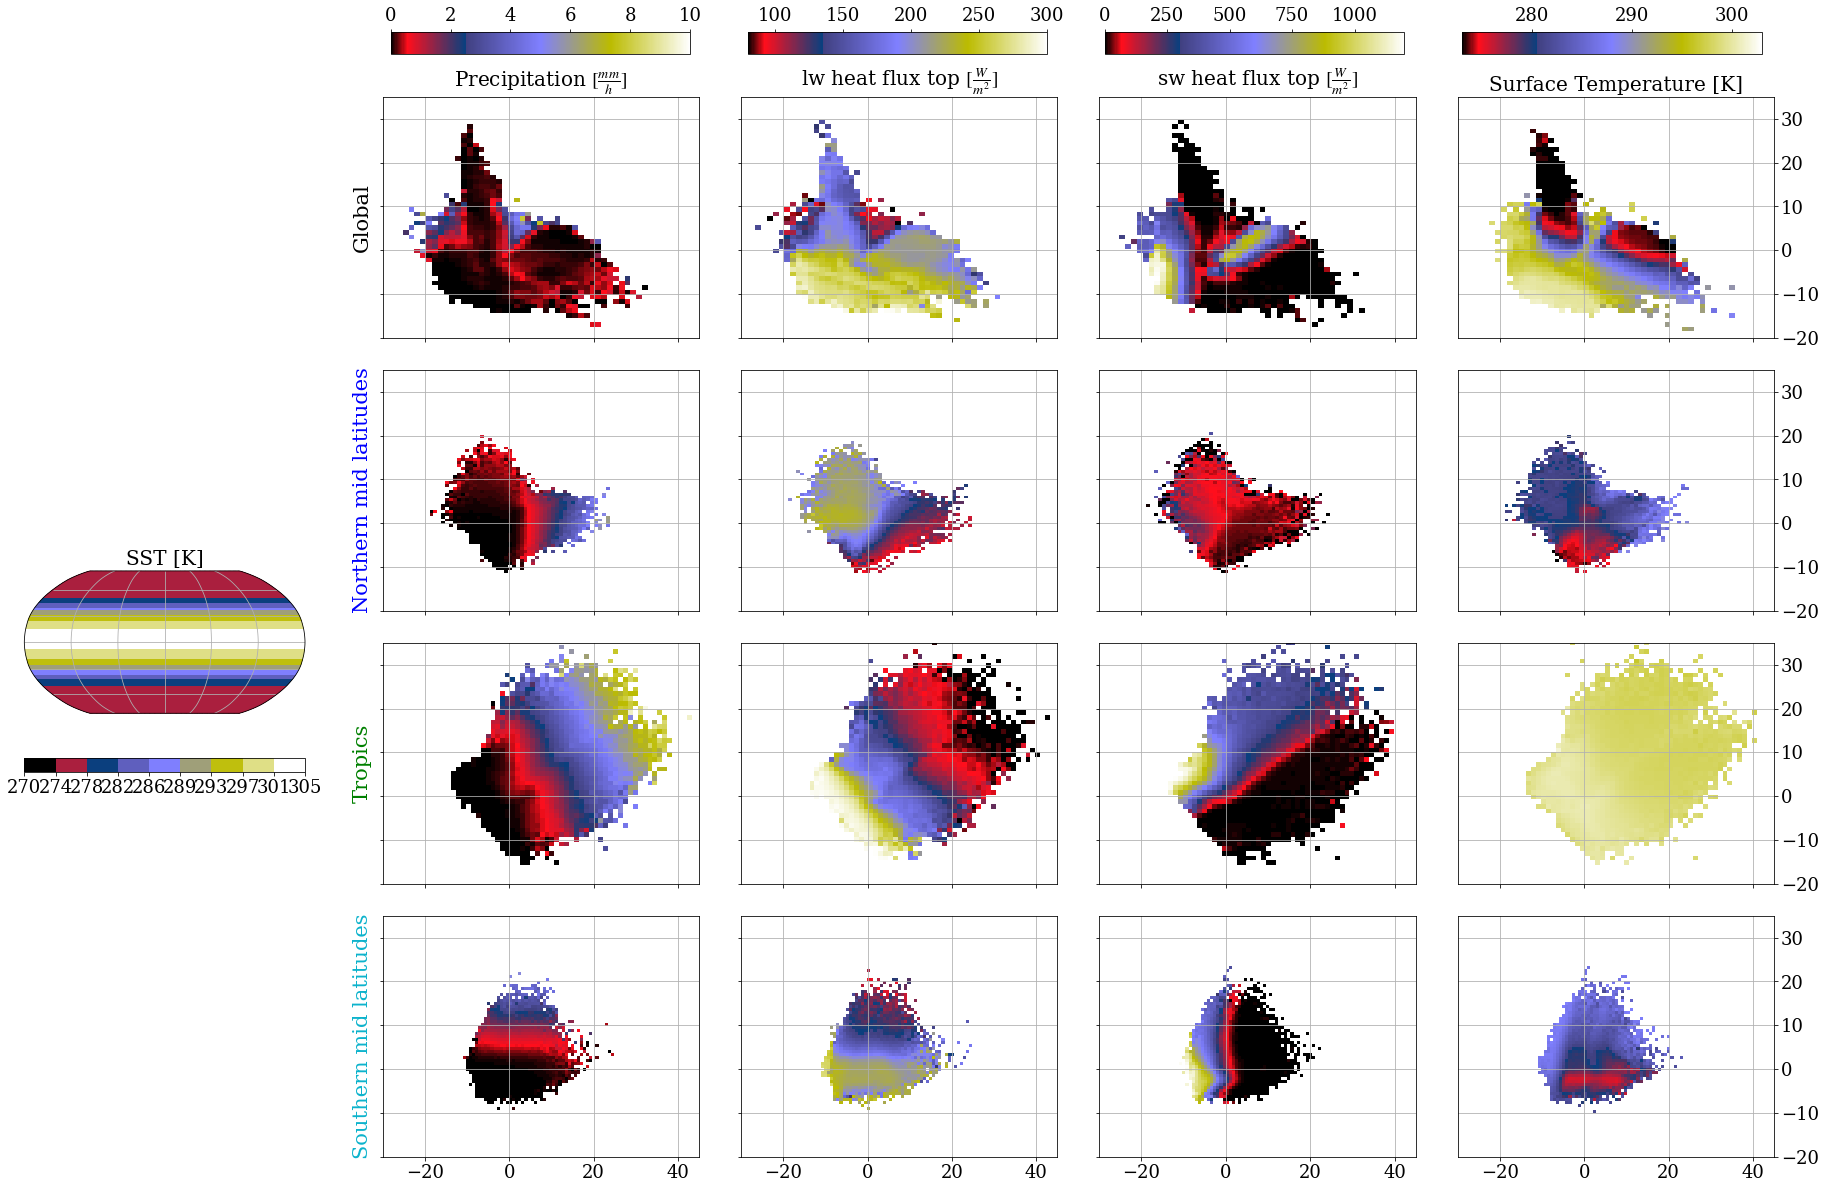

In [65]:

fig = plt.figure(4,(32,20))

gs = fig.add_gridspec(40, 50)

ax1 = fig.add_subplot(gs[15:26, 0:8], projection=ccrs.Robinson(central_longitude=0))

imag=ax1.pcolormesh(Longitude, Latitude, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=Theta_min,vmax=Theta_max)
#ax1.plot(long_band,NH_mid_lat,'b',Linewidth=3,transform=ccrs.PlateCarree())
#ax1.plot(long_band,SH_mid_lat,color=[0.05,0.7,0.8,1],Linewidth=3,transform=ccrs.PlateCarree())
#ax1.plot(long_band,tropics,'green',Linewidth=3,transform=ccrs.PlateCarree())

ax1.gridlines()
plt.title('SST [K]',Fontsize=20)

#cbar_ax = fig.add_axes([0.10, 0.41, 0.15, 0.02])

cb_1=fig.colorbar(imag,orientation='horizontal')#,ax=cbar_ax)
        
ax2 = fig.add_subplot(gs[0:9, 10:19])
imag2=ax2.pcolormesh(xx,yy,precipitation,cmap=plt.cm.gist_stern)
ax2.grid(True)
plt.title('Precipitation '+r'$[\frac{mm}{h}]$',Fontsize=20)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
plt.ylabel('Global',Fontsize=21)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

imag2.set_clim(prec_min,prec_max)
#plt.colorbar(imag2)
cbar_ax = fig.add_axes([0.284,0.91, 0.13, 0.015])
fig.colorbar(imag2, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')


ax3 = fig.add_subplot(gs[0:9, 20:29])
imag3=ax3.pcolormesh(xx,yy,OLR,cmap=plt.cm.gist_stern)
ax3.grid(True)
plt.title('lw heat flux top '+r'$[\frac{W}{m^2}]$',Fontsize=20)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax3.set_xticklabels([])
ax3.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag3.set_clim(OLR_min,OLR_max)
cbar_ax = fig.add_axes([0.439,0.91, 0.13, 0.015])
fig.colorbar(imag3, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')


ax4 = fig.add_subplot(gs[0:9, 30:39])
imag4=ax4.pcolormesh(xx,yy,Q_SW_TOP,cmap=plt.cm.gist_stern)
ax4.grid(True)
plt.title('sw heat flux top '+r'$[\frac{W}{m^2}]$',Fontsize=20)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag4.set_clim(sw_hf_top_min,sw_hf_top_max)

cbar_ax = fig.add_axes([0.594,0.91, 0.13, 0.015])
fig.colorbar(imag4, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')


ax5 = fig.add_subplot(gs[0:9, 40:49])
imag5=ax5.pcolormesh(xx,yy,T_surf,cmap=plt.cm.gist_stern)
ax5.grid(True)
plt.title('Surface Temperature [K]',Fontsize=20)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax5.set_xticklabels([])
ax5.yaxis.tick_right()

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag5.set_clim(T_min,T_max)
cbar_ax = fig.add_axes([0.749,0.91, 0.13, 0.015])
fig.colorbar(imag5, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')






ax6 = fig.add_subplot(gs[10:19, 10:19])
imag6=ax6.pcolormesh(xx_NH,yy_NH,precip_NH_ml,cmap=plt.cm.gist_stern)
ax6.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax6.set_xticklabels([])
ax6.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Northern mid latitudes',color='blue',Fontsize=21)

imag6.set_clim(prec_min,prec_max)
#plt.colorbar(imag6)

ax7 = fig.add_subplot(gs[10:19, 20:29])
imag7=ax7.pcolormesh(xx_NH,yy_NH,OLR_NH_ml,cmap=plt.cm.gist_stern)
ax7.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax7.set_xticklabels([])
ax7.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag7.set_clim(OLR_min,OLR_max)
#plt.colorbar(imag7)


ax8 = fig.add_subplot(gs[10:19, 30:39])
imag8=ax8.pcolormesh(xx_NH,yy_NH,Q_sw_NH_ml,cmap=plt.cm.gist_stern)
ax8.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax8.set_xticklabels([])
ax8.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag8.set_clim(sw_hf_top_min,sw_hf_top_max)
#plt.colorbar(imag8)


ax9 = fig.add_subplot(gs[10:19, 40:49])
imag9=ax9.pcolormesh(xx_NH,yy_NH,SAT_NH,cmap=plt.cm.gist_stern)
ax9.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax9.set_xticklabels([])
ax9.yaxis.tick_right()

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag9.set_clim(T_min,T_max)
#plt.colorbar(imag7)








ax10 = fig.add_subplot(gs[20:29, 10:19])
imag10=ax10.pcolormesh(xx_trop,yy_trop,precip_tropic,cmap=plt.cm.gist_stern)
ax10.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax10.set_xticklabels([])
ax10.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Tropics',color='green',Fontsize=21)

imag10.set_clim(prec_min,prec_max)
#plt.colorbar(imag8)

ax11 = fig.add_subplot(gs[20:29, 20:29])
imag11=ax11.pcolormesh(xx_trop,yy_trop,OLR_tropic,cmap=plt.cm.gist_stern)
ax11.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax11.set_xticklabels([])
ax11.set_yticklabels([])
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag11.set_clim(OLR_min,OLR_max)
#plt.colorbar(imag9)


ax12 = fig.add_subplot(gs[20:29, 30:39])
imag12=ax12.pcolormesh(xx_trop,yy_trop,Q_sw_tropic,cmap=plt.cm.gist_stern)
ax12.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax12.set_xticklabels([])
ax12.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag12.set_clim(sw_hf_top_min,sw_hf_top_max)
#plt.colorbar(imag10)


ax13 = fig.add_subplot(gs[20:29, 40:49])
imag13=ax13.pcolormesh(xx_trop,yy_trop,SAT_trop,cmap=plt.cm.gist_stern)
ax13.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax13.set_xticklabels([])
ax13.yaxis.tick_right()
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag13.set_clim(T_min,T_max)
#plt.colorbar(imag11)



ax14 = fig.add_subplot(gs[30:39, 10:19])
imag14=ax14.pcolormesh(xx_SH,yy_SH,precip_SH,cmap=plt.cm.gist_stern)
ax14.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax14.set_yticklabels([])
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Southern mid latitudes',color=[0.05,0.7,0.8,1],Fontsize=21)

imag14.set_clim(prec_min,prec_max)
#plt.colorbar(imag12)

ax15 = fig.add_subplot(gs[30:39, 20:29])
imag15=ax15.pcolormesh(xx_SH,yy_SH,OLR_SH,cmap=plt.cm.gist_stern)
ax15.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax15.set_yticklabels([])
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag15.set_clim(OLR_min,OLR_max)
#plt.colorbar(imag13)


ax16 = fig.add_subplot(gs[30:39, 30:39])
imag16=ax16.pcolormesh(xx_SH,yy_SH,Q_sw_SH_ml,cmap=plt.cm.gist_stern)
ax16.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax16.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag16.set_clim(sw_hf_top_min,sw_hf_top_max)
#plt.colorbar(imag14)


ax17 = fig.add_subplot(gs[30:39, 40:49])
imag17=ax17.pcolormesh(xx_SH,yy_SH,SAT_SH,cmap=plt.cm.gist_stern)
ax17.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax17.yaxis.tick_right()

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag17.set_clim(T_min,T_max)
#plt.colorbar(imag15)



In [62]:
print(SOLIN.shape)

(49, 49)


In [62]:
fz=18
plt.rc('font', family='serif', size=fz)


This is the figure version of VAE$_{clim \rightarrow clim + conv}$ shown in the supplemental material 

<ipython-input-64-a32373867e15>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Sea Surface Temperature [$K$]',Fontsize=20)
<ipython-input-64-a32373867e15>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Precipitation '+r'$[\frac{mm}{h}]$',Fontsize=24)
<ipython-input-64-a32373867e15>:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Global',Fontsize=24)
<ipython-input-64-a32373867e15>:42: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title(r'Q$_{lw \ top}$ $[\frac{W}{m^2}]$',Fontsize=24)
<ipython-input-64-a32373867e15>:59: MatplotlibDeprecationWarning: Case-insensitive properties were deprec

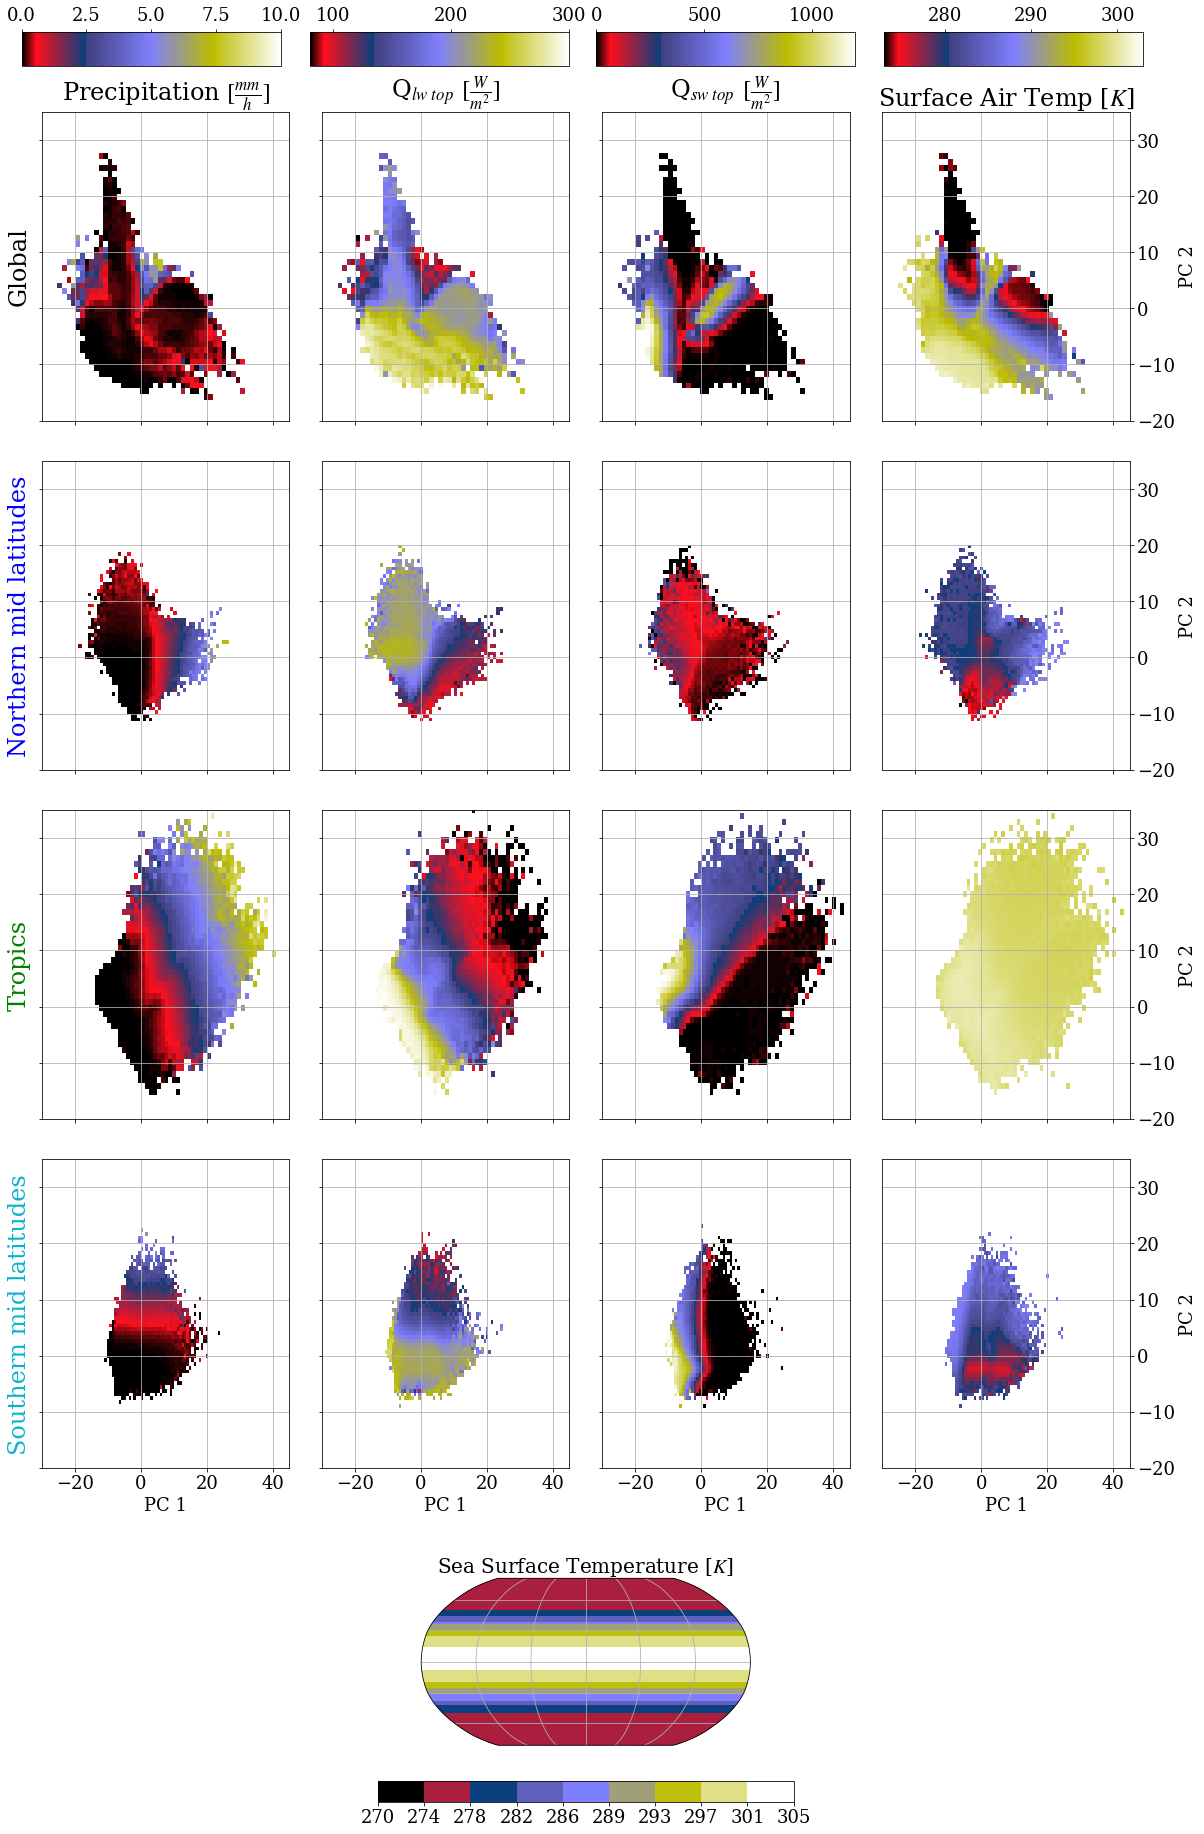

In [64]:
fig = plt.figure(4,(20,32))

gs = fig.add_gridspec(50, 40)

ax1 = fig.add_subplot(gs[42:49, 12:27], projection=ccrs.Robinson(central_longitude=0))

imag=ax1.pcolormesh(Longitude, Latitude, data,
                                cmap=seism, norm=norm_seism, 
                                transform=ccrs.PlateCarree(),vmin=Theta_min,vmax=Theta_max)
#ax1.plot(long_band,NH_mid_lat,'b',Linewidth=3,transform=ccrs.PlateCarree())
#ax1.plot(long_band,SH_mid_lat,color=[0.05,0.7,0.8,1],Linewidth=3,transform=ccrs.PlateCarree())
#ax1.plot(long_band,tropics,'green',Linewidth=3,transform=ccrs.PlateCarree())

ax1.gridlines()
plt.title('Sea Surface Temperature [$K$]',Fontsize=20)

#cbar_ax = fig.add_axes([0.10, 0.41, 0.15, 0.02])

cb_1=fig.colorbar(imag,orientation='horizontal')#,ax=cbar_ax)
        
ax2 = fig.add_subplot(gs[0:9, 0:9])
imag2=ax2.pcolormesh(xx,yy,precipitation,cmap=plt.cm.gist_stern)
ax2.grid(True)
plt.title('Precipitation '+r'$[\frac{mm}{h}]$',Fontsize=24)
#plt.xlabel('PC 1 of latent space',Fontsize=13)
plt.ylabel('Global',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

imag2.set_clim(prec_min,prec_max)
#plt.colorbar(imag2)
cbar_ax = fig.add_axes([0.111,0.90,0.18,0.015])
fig.colorbar(imag2, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')


ax3 = fig.add_subplot(gs[0:9, 10:19])
imag3=ax3.pcolormesh(xx,yy,OLR,cmap=plt.cm.gist_stern)
ax3.grid(True)
plt.title(r'Q$_{lw \ top}$ $[\frac{W}{m^2}]$',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax3.set_xticklabels([])
ax3.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag3.set_clim(OLR_min,OLR_max)
cbar_ax = fig.add_axes([0.311,0.90, 0.18, 0.015])
fig.colorbar(imag3, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')


ax4 = fig.add_subplot(gs[0:9, 20:29])
imag4=ax4.pcolormesh(xx,yy,Q_SW_TOP,cmap=plt.cm.gist_stern)
ax4.grid(True)
plt.title(r'Q$_{sw \ top}$ $[\frac{W}{m^2}]$',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag4.set_clim(sw_hf_top_min,sw_hf_top_max)

cbar_ax = fig.add_axes([0.51,0.90, 0.18, 0.015])
fig.colorbar(imag4, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')


ax5 = fig.add_subplot(gs[0:9, 30:39])
imag5=ax5.pcolormesh(xx,yy,T_surf,cmap=plt.cm.gist_stern)
ax5.grid(True)
plt.title('Surface Air Temp [$K$]',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax5.set_xticklabels([])
ax5.yaxis.tick_right()
ax5.yaxis.set_label_position("right")

#plt.xlabel('PC 1 of latent space',Fontsize=13)
plt.ylabel('PC 2')
imag5.set_clim(T_min,T_max)
cbar_ax = fig.add_axes([0.71,0.90, 0.18, 0.015])
fig.colorbar(imag5, cax=cbar_ax,orientation='horizontal')
cbar_ax.xaxis.set_ticks_position('top')






ax6 = fig.add_subplot(gs[10:19, 0:9])
imag6=ax6.pcolormesh(xx_NH,yy_NH,precip_NH_ml,cmap=plt.cm.gist_stern)
ax6.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax6.set_xticklabels([])
ax6.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Northern mid latitudes',color='blue',Fontsize=24)

imag6.set_clim(prec_min,prec_max)
#plt.colorbar(imag6)

ax7 = fig.add_subplot(gs[10:19, 10:19])
imag7=ax7.pcolormesh(xx_NH,yy_NH,OLR_NH_ml,cmap=plt.cm.gist_stern)
ax7.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax7.set_xticklabels([])
ax7.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag7.set_clim(OLR_min,OLR_max)
#plt.colorbar(imag7)


ax8 = fig.add_subplot(gs[10:19, 20:29])
imag8=ax8.pcolormesh(xx_NH,yy_NH,Q_sw_NH_ml,cmap=plt.cm.gist_stern)
ax8.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax8.set_xticklabels([])
ax8.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag8.set_clim(sw_hf_top_min,sw_hf_top_max)
#plt.colorbar(imag8)


ax9 = fig.add_subplot(gs[10:19, 30:39])
imag9=ax9.pcolormesh(xx_NH,yy_NH,SAT_NH,cmap=plt.cm.gist_stern)
ax9.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax9.set_xticklabels([])
ax9.yaxis.tick_right()
ax9.yaxis.set_label_position("right")


#plt.xlabel('PC 1 of latent space',Fontsize=13)
plt.ylabel('PC 2')
imag9.set_clim(T_min,T_max)
#plt.colorbar(imag7)








ax10 = fig.add_subplot(gs[20:29, 0:9])
imag10=ax10.pcolormesh(xx_trop,yy_trop,precip_tropic,cmap=plt.cm.gist_stern)
ax10.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax10.set_xticklabels([])
ax10.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Tropics',color='green',Fontsize=24)

imag10.set_clim(prec_min,prec_max)
#plt.colorbar(imag8)

ax11 = fig.add_subplot(gs[20:29, 10:19])
imag11=ax11.pcolormesh(xx_trop,yy_trop,OLR_tropic,cmap=plt.cm.gist_stern)
ax11.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax11.set_xticklabels([])
ax11.set_yticklabels([])
#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag11.set_clim(OLR_min,OLR_max)
#plt.colorbar(imag9)


ax12 = fig.add_subplot(gs[20:29, 20:29])
imag12=ax12.pcolormesh(xx_trop,yy_trop,Q_sw_tropic,cmap=plt.cm.gist_stern)
ax12.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax12.set_xticklabels([])
ax12.set_yticklabels([])

#plt.xlabel('PC 1 of latent space',Fontsize=13)
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag12.set_clim(sw_hf_top_min,sw_hf_top_max)
#plt.colorbar(imag10)


ax13 = fig.add_subplot(gs[20:29, 30:39])
imag13=ax13.pcolormesh(xx_trop,yy_trop,SAT_trop,cmap=plt.cm.gist_stern)
ax13.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax13.set_xticklabels([])
ax13.yaxis.tick_right()
plt.ylabel('PC 2')
ax13.yaxis.set_label_position("right")

imag13.set_clim(T_min,T_max)
#plt.colorbar(imag11)



ax14 = fig.add_subplot(gs[30:39, 0:9])
imag14=ax14.pcolormesh(xx_SH,yy_SH,precip_SH,cmap=plt.cm.gist_stern)
ax14.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax14.set_yticklabels([])

plt.xlabel('PC 1')
#plt.ylabel('PC 2 of latent space',Fontsize=13)
plt.ylabel('Southern mid latitudes',color=[0.05,0.7,0.8,1],Fontsize=24)

imag14.set_clim(prec_min,prec_max)
#plt.colorbar(imag12)

ax15 = fig.add_subplot(gs[30:39, 10:19])
imag15=ax15.pcolormesh(xx_SH,yy_SH,OLR_SH,cmap=plt.cm.gist_stern)
ax15.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax15.set_yticklabels([])
plt.xlabel('PC 1')
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag15.set_clim(OLR_min,OLR_max)
#plt.colorbar(imag13)


ax16 = fig.add_subplot(gs[30:39, 20:29])
imag16=ax16.pcolormesh(xx_SH,yy_SH,Q_sw_SH_ml,cmap=plt.cm.gist_stern)
ax16.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax16.set_yticklabels([])

plt.xlabel('PC 1')
#plt.ylabel('PC 2 of latent space',Fontsize=13)
imag16.set_clim(sw_hf_top_min,sw_hf_top_max)
#plt.colorbar(imag14)


ax17 = fig.add_subplot(gs[30:39, 30:39])
imag17=ax17.pcolormesh(xx_SH,yy_SH,SAT_SH,cmap=plt.cm.gist_stern)
ax17.grid(True)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax17.yaxis.tick_right()
ax17.yaxis.set_label_position("right")

plt.xlabel('PC 1')
plt.ylabel('PC 2')
imag17.set_clim(T_min,T_max)
#plt.colorbar(imag15)


# Conditional averages in 2D PCA compressed latent space of VAE${clim \rightarrow clim + conv}$ shown in main paper (Figure 5)

In [36]:
prec_max_glob=8 #[mm/h] selecting a smaller precip maximum for these global plots 

<ipython-input-37-b523113d0f08>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Solar Insolation '+r'$[\frac{W}{m^2}]$',Fontsize=24)
<ipython-input-37-b523113d0f08>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('PC 2', Fontsize=20)
<ipython-input-37-b523113d0f08>:23: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Precipitation '+r'$[\frac{mm}{h}]$',Fontsize=24)
<ipython-input-37-b523113d0f08>:36: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Outgoing Longwave Radiation '+r'$[\frac{W}{m^2}]$',Fontsize=24)
<ipython-input-37-b523113d0f08>:39: MatplotlibDeprecationWarning: Case-insensitive

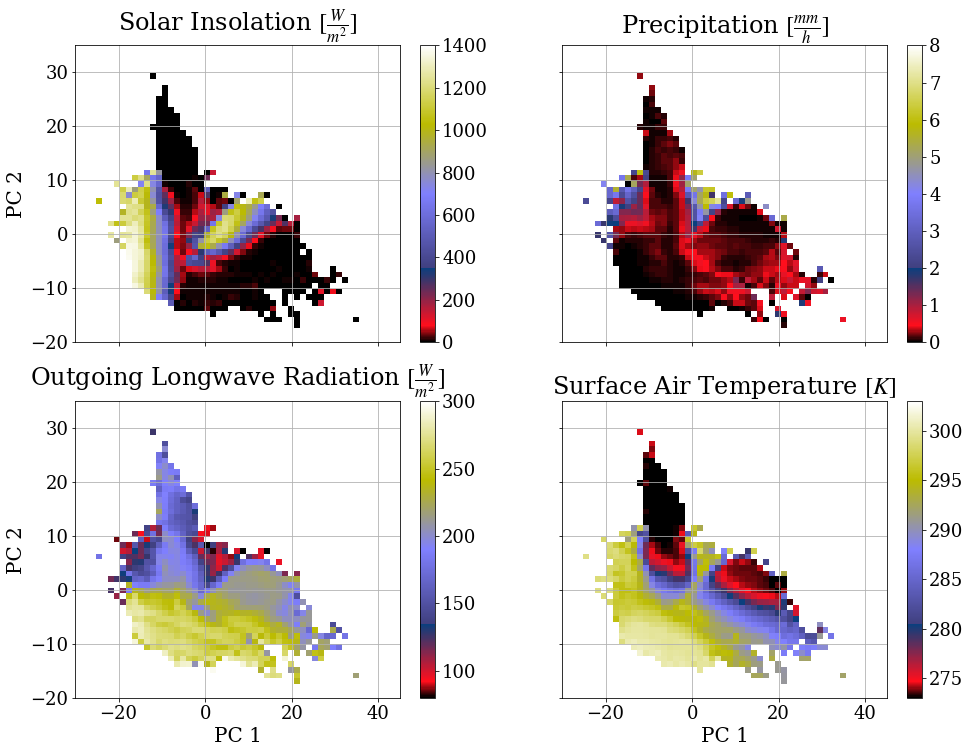

In [37]:
fig = plt.figure(4,(16,12))


ax1 = fig.add_subplot(2,2,1)
imag1=ax1.pcolormesh(xx,yy,SOLIN,cmap=plt.cm.gist_stern)
ax1.grid(True)
plt.title('Solar Insolation '+r'$[\frac{W}{m^2}]$',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax1.set_xticklabels([])
plt.ylabel('PC 2', Fontsize=20)
imag1.set_clim(SOLIN_min,SOLIN_max)
plt.colorbar(imag1)






ax2 = fig.add_subplot(2,2,2)
imag2=ax2.pcolormesh(xx,yy,precipitation,cmap=plt.cm.gist_stern)
ax2.grid(True)
plt.title('Precipitation '+r'$[\frac{mm}{h}]$',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax2.set_xticklabels([])
ax2.set_yticklabels([])

imag2.set_clim(prec_min,prec_max_glob)

plt.colorbar(imag2)

ax3 = fig.add_subplot(2,2,3)
imag3=ax3.pcolormesh(xx,yy,OLR,cmap=plt.cm.gist_stern)
ax3.grid(True)
plt.title('Outgoing Longwave Radiation '+r'$[\frac{W}{m^2}]$',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.ylabel('PC 2', Fontsize=20)
plt.xlabel('PC 1', Fontsize=20)

imag3.set_clim(OLR_min,OLR_max)
plt.colorbar(imag3)






ax4 = fig.add_subplot(2,2,4)
imag4=ax4.pcolormesh(xx,yy,T_surf,cmap=plt.cm.gist_stern)
ax4.grid(True)
plt.title('Surface Air Temperature '+r'$[K]$',Fontsize=24)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
ax4.set_yticklabels([])
plt.xlabel('PC 1',Fontsize=20)
imag4.set_clim(T_min,T_max)

plt.colorbar(imag4)



